### **Question :** With the given dataset, build a model to predict 'audience_rating'. Demonstrate the working of the pipeline with a notebook, also validate the model for its accuracy.

# **1 Convert dataset into a '.csv' file**


It's generally recommended to convert .xls files to .csv in production settings because .csv files are:
- Lightweight and faster to process.
- Easier to handle with most data processing libraries.
- More universally supported across platforms.

In [564]:
import pandas as pd

dataset = 'Rotten_Tomatoes_Movies3.xls'
df = pd.read_excel(dataset)


In [565]:
# Save it as a .csv file
csv_file = 'Rotten_tomatoes_Movies3.csv'  
df.to_csv(csv_file, index=False)

print(f"The file is converted and saved as {csv_file}")

The file is converted and saved as Rotten_tomatoes_Movies3.csv


# **2. Importing Libraries**

To install all the libraries mentioned in the code snippet, you can use the following pip command:

```bash
pip install pandas numpy matplotlib seaborn scikit-learn joblib tabulate
```

This command will install the following libraries:

1. pandas
2. numpy
3. matplotlib
4. seaborn
5. scikit-learn (which includes sklearn)
6. joblib
7. tabulate

Note that `io` and `ast` are part of Python's standard library, so they don't need to be installed separately.

Also, keep in mind that some of these libraries might have dependencies that will be automatically installed along with them. For example, scikit-learn includes many of the machine learning tools mentioned in the import statements.

If you're using a Jupyter notebook or want to install these libraries in a specific environment, make sure to activate that environment before running the pip install command.


In [566]:
# Import libraries for data handling and manipulation
import pandas as pd  # For handling tabular data (DataFrames)
import numpy as np  # For performing numerical operations

# Import libraries for data visualization
import matplotlib.pyplot as plt  # For creating basic plots and graphs
import seaborn as sns  # For creating more advanced and visually appealing plots

# Import libraries for data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling data and encoding labels

# Import libraries for model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score  # For splitting data and hyperparameter tuning
from sklearn.linear_model import LinearRegression  # For Linear Regression model
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree Regression model
from sklearn.ensemble import RandomForestRegressor  # For Random Forest Regression model
from sklearn.svm import SVR  # For Support Vector Regression model

# Import libraries for performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For evaluating model performance

# Import library for model persistence
import joblib  # For saving and loading models

# Import library for formatted output in tables
from tabulate import tabulate  # For displaying results in a formatted table

# Import library for in-memory file handling
import io  # For working with files in memory

# Import library for safely evaluating strings into Python objects
import ast  # For converting strings to Python objects (e.g., dict, list) safely


 # **3. Understanding the Dataset**

## **3.1. Loading the Dataset**

In [567]:
# Now that the dataset is in .csv format, we can load it into a DataFrame for processing.
df = pd.read_csv('Rotten_tomatoes_Movies3.csv')
# Inspect the first 5 rows
df.head(5)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


## **3.2. Dataset Overview (number of entries, columns, data types)**

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
dtypes: f

- **Total Columns**: 16
- **Target Variable**: `audience_rating` (numerical, float64)

**Column Breakdown**

1. **Numerical Features**:
   - `runtime_in_minutes` (float64)
   - `tomatometer_rating` (int64)
   - `tomatometer_count` (int64)
   - `audience_rating` (float64, target variable)

2. **Categorical Features**:
   - `rating` (object)
   - `genre` (object)
   - `directors` (object)
   - `writers` (object)
   - `cast` (object)
   - `studio_name` (object)
   - `tomatometer_status` (object)

3. **Text-based Features**:
   - `movie_info` (object)
   - `critics_consensus` (object)

4. **Date Features**:
   - `in_theaters_date` (object, needs to be converted to datetime if needed)
   - `on_streaming_date` (object, needs to be converted to datetime if needed)

## **3.3. Get Basic Statistics**

In [569]:
df.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,16483.000000,16638.000000,16638.000000,16386.000000
mean,102.391494,60.466522,56.607104,60.470829
std,25.028011,28.587230,66.383800,20.462368
min,1.000000,0.000000,5.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000
50%,99.000000,66.000000,28.000000,62.000000
75%,111.000000,86.000000,76.000000,77.000000
max,2000.000000,100.000000,497.000000,100.000000


**When we breakdown the above results:**

### **1. `runtime_in_minutes`** (Movie runtime):
- **Mean**: On average, movies in the dataset are about **102 minutes** long.
- **Min**: The shortest movie is only **1 minute**, which is likely an outlier or data error.
- **Max**: The longest movie is **2000 minutes**—this seems extremely high and might be an error.
- **Std**: There's a lot of variation (**25 minutes**) in the movie runtime.

### **2. `tomatometer_rating`** (Critics' rating):
- **Mean**: Critics give an average rating of **60.47**.
- **Min**: The lowest critic rating is **0**, which likely indicates a poorly rated or failed movie or an outlier.
- **Max**: The highest rating is **100**, meaning some movies got perfect ratings.
- **Std**: Critics’ ratings vary by **28.59** points.

### **3. `tomatometer_count`** (Number of critics’ reviews):
- **Mean**: On average movies have **56.61** critic reviews.
- **Min**: Some movies have only **5 reviews**, which might indicate less-known movies.
- **Max**: A maximum of **497 reviews**, which could be for a popular movie.
- **Std**: The number of reviews varies widely (**66.38**).

### **4. `audience_rating`** (Audience rating):
- **Mean**: On average, movies have an **audience rating of 60.47**.
- **Min**: The lowest rating is **0** which likely means a very poorly rated movie by the audience.
- **Max**: The highest rating is **100**, indicating perfect audience ratings.
- **Std**: The audience ratings also have a high variation (**20.46**).

### **Key Takeaways:**
- **Outliers**: The minimum runtime (1 minute) and maximum runtime (2000 minutes) might be errors. We could investigate these further.
- **Spread**: There’s significant variation in critics' ratings, the number of reviews, and audience ratings, which suggests the dataset is diverse in movie types and reception.
- **Audience rating correlation**: The audience rating seems to have a similar spread to the critics' rating, suggesting some correlation between the two.

In short, the purpose of this step is to look for anomalies (for e.g. extreme runtimes) and this basic data summary shows us that the dataset is varied with both outliers and diverse values.



## **3.4. Checking for Missing Values**

In [570]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

From the above results:
The dataset has some missing values, particularly in text and categorical columns, which will need to be handled during preprocessing.

**Columns with Missing Values:**

- **movie_info**: 24 missing values (16,614 non-null out of 16,638).
- **critics_consensus**: 8,329 missing values (8,309 non-null out of 16,638).
- **genre**: 17 missing values (16,621 non-null out of 16,638).
- **directors**: 114 missing values (16,524 non-null out of 16,638).
- **writers**: 349 missing values (15,289 non-null out of 16,638).
- **cast**: 284 missing values (16,354 non-null out of 16,638).
- **in_theaters_date**: 815 missing values (15,823 non-null out of 16,638).
- **on_streaming_date**: 2 missing values (16,636 non-null out of 16,638).
- **runtime_in_minutes**: 155 missing values (16,483 non-null out of 16,638).
- **studio_name**: 416 missing values (16,222 non-null out of 16,638).
- **audience_rating**: 252 missing values (16,386 non-null out of 16,638).

# **4. Performing Basic EDA** 

## **4.1. Visualizing Target Variable Distribution**

We want to use a is plot to visualize the distribution of audience ratings as its our target variable and see if there’s a pattern or skew towards any ratings. We'll use a histogram with Kernel Density Estimation to show the distribution of data. This visualization helps us understand how audiences rate movies overall - it's super useful because it helps us spot any weird patterns (like if most movies get middling scores) before building our prediction model. The idea came from wanting to better understand the data’s spread and highlight the mean to see how ratings are clustered around it. By using a histogram with KDE, we get both a clear view of the data distribution and a smoothed estimate, which helps us understand the overall shape of the audience rating variable. This is important for deciding how to preprocess data or which models might be more suitable (e.g., linear models for normally distributed data, tree-based models for skewed data).

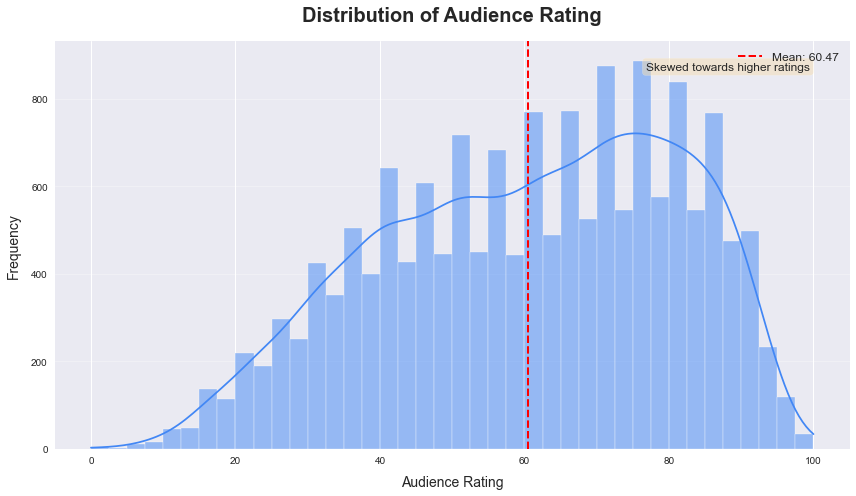

In [571]:


# Set the style for a more aesthetic look
plt.style.use('seaborn')  # This makes the plot look better and cleaner

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 7)) 

# Plot the histogram with KDE (Kernel Density Estimation) to show the distribution of data
sns.histplot(data=df, x='audience_rating', kde=True, color='#4287f5', ax=ax)  
# 'audience_rating' is the column we are interested in plotting. 'kde=True' adds a smooth curve.

# Customize the plot (add titles and labels)
ax.set_title('Distribution of Audience Rating', fontsize=20, fontweight='bold', pad=20) 
ax.set_xlabel('Audience Rating', fontsize=14, labelpad=10) 
ax.set_ylabel('Frequency', fontsize=14, labelpad=10) 

# Add a grid for better readability
ax.grid(axis='y', alpha=0.3)  # Grid only for the y-axis (vertical), set transparency to 30%

# Remove top and right spines to make the plot cleaner
ax.spines['top'].set_visible(False)  # Remove the top line of the plot
ax.spines['right'].set_visible(False)  # Remove the right line of the plot

# Add a red dashed line to show the mean value of audience ratings
mean_rating = df['audience_rating'].mean()  # Calculate the mean (average) rating
ax.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_rating:.2f}')  # Show mean with a red line

# Add legend to the plot to explain the lines
ax.legend(fontsize=12)  # The legend shows what the red line represents

# Add a text box to the plot to explain something interesting
ax.text(0.95, 0.95, 'Skewed towards higher ratings',  # Position of the text
        transform=ax.transAxes, fontsize=12,  # This makes sure the text stays in the plot area
        verticalalignment='top', horizontalalignment='right',  # Align the text in the top-right
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)) 

plt.tight_layout()  # Adjusts everything so it fits nicely in the figure
plt.show()  



**Explanation:**
- This histogram shows the distribution of the 'audience_rating'.
- The ratings go from 0 to 100, but most people seem to rate things between about 40 and 80. There's a big spike around 75-80, meaning a lot of people gave ratings in that range.
- The average rating is 62.99, which is shown in the top right corner. That's not bad, but not amazing either.
- The graph is kind of lopsided, with more ratings on the higher end. This is called being "skewed towards higher ratings" in fancy stats talk. It basically means people were more likely to give good ratings than bad ones, which is pretty common for audience scores.

# **5. Data Preprocessing:**

This stage handles essential preprocessing steps to prepare the dataset for machine learning. First, we removes rows with missing values (`df.dropna()`), which is crucial because missing data can lead to inaccurate models and biased predictions. Then, categorical features are encoded using label encoding (`LabelEncoder`), which converts non-numeric values into numeric labels. This is necessary because most machine learning algorithms require numerical input, and label encoding ensures that categorical variables are properly represented as numbers while maintaining their relationship within the data. Afterward, the dataset is split into features (X) and the target variable ('audience_rating'), which allows the model to learn from the inputs to predict the target. Finally, the train-test split ensures that we can evaluate the model's performance on unseen data, preventing overfitting and giving us a more reliable measure of how the model will perform in real-world scenarios. These steps ensure that the data is clean, structured, and ready for model training and validation.

## **5.1. Handling Missing Values and Encoding variables:**

In [572]:
# Handle missing values
df = df.dropna()

# Encode categorical features
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target variable
X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed. Features encoded and data split into training and testing sets.")


Data preprocessing completed. Features encoded and data split into training and testing sets.


# **6. Define and Evaluate Models**

## **6.1. Initial Model Evaluations**

We tests different regression models to predict 'audience_rating', which is a continuous value. Since we're predicting a number rather than a category, this is a **regression problem**—a type of problem where the goal is to predict a continuous outcome, unlike classification, which deals with categories.

The four models used each have their strengths:

- **Linear Regression** is a simple model that works well if the relationship between the features and the target is linear. It’s a good starting point to see how well the data can be modeled with a basic approach.
- **Random Forest Regressor** is an ensemble method that combines many decision trees. It’s great for capturing complex, non-linear patterns in the data and can handle a variety of situations more effectively than simpler models.
- **Decision Tree Regressor** is useful when the data has clear decision points or splits. While it can be powerful, it’s prone to overfitting if not tuned properly, especially with noisy data.
- **Support Vector Regression (SVR)** is good for capturing more complex relationships that other models might miss. It’s designed to handle situations where the data doesn’t follow a simple linear trend.

These models are evaluated using **Mean Squared Error (MSE)** and **R2 Score**, which help us see how well each model predicts audience ratings. These metrics show how close the predictions are to the actual ratings and how much of the variation in the ratings the model can explain. This helps us pick the best model for making predictions.

In [573]:
#import pandas as pd
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
#from tabulate import tabulate  # Import tabulate for better table formatting

# Define the function to evaluate models
def evaluate_models(X_train, y_train, X_test, y_test):
    """
    Evaluates regression models and returns their performance metrics as a DataFrame.
    
    Parameters:
        X_train, y_train: Training data
        X_test, y_test: Testing data
    
    Returns:
        DataFrame with model names, Mean Squared Error, and R2 Score.
    """
    # Step 1: Define a dictionary of regression models to test
    models = {
        'Linear Regression': LinearRegression(),  # Simple linear regression model
        'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=None, 
                                               min_samples_split=2, min_samples_leaf=1, random_state=42),  # Ensemble learning model
        'Decision Tree': DecisionTreeRegressor(max_depth=None, min_samples_split=2, 
                                               min_samples_leaf=1, random_state=42),  # Single decision tree model
        'Support Vector Regression': SVR()  # Support Vector Regression model
    }
    
    # Step 2: Initialize an empty DataFrame to store the evaluation metrics
    results_df = pd.DataFrame(columns=["Model", "Mean Squared Error", "R2 Score"])

    # Step 3: Loop through each model, train it, and compute evaluation metrics
    for name, model in models.items():
        model.fit(X_train, y_train)  # Train the model on the training data
        y_pred = model.predict(X_test)  # Use the model to predict on test data
        mse = mean_squared_error(y_test, y_pred)  # Calculate the Mean Squared Error
        r2 = r2_score(y_test, y_pred)  # Calculate the R2 Score
        
        # Append the results to the DataFrame
        results_df = pd.concat([results_df, pd.DataFrame([[name, mse, r2]], columns=results_df.columns)], ignore_index=True)

    return results_df  # Return the DataFrame with results


In [574]:
# Evaluate models and store results
results_df = evaluate_models(X_train, y_train, X_test, y_test)

# Display the tabulated results
display_results(results_df)


C:\Users\rsrin\AppData\Local\Temp\ipykernel_25216\1081949612.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([[name, mse, r2]], columns=results_df.columns)], ignore_index=True)



=== Model Performance Evaluation ===
+---------------------------+----------------------+------------+
| Model                     |   Mean Squared Error |   R2 Score |
+===========================+======================+============+
| Linear Regression         |              166.845 |  0.561405  |
+---------------------------+----------------------+------------+
| Random Forest             |              151.979 |  0.600483  |
+---------------------------+----------------------+------------+
| Decision Tree             |              311.707 |  0.180596  |
+---------------------------+----------------------+------------+
| Support Vector Regression |              361.691 |  0.0491999 |
+---------------------------+----------------------+------------+


These metrics show how well each model performs. Lower MSE and higher R2 indicate better performance.

## **6.2. Hyperparameter Tuning**

**Note:** Linear Regression is not included in hyperparameter tuning because it's a parametric algorithm
with a closed-form solution. It doesn't have hyperparameters that significantly affect its performance,
unlike the other models which have various hyperparameters that can be tuned to optimize their performance.

### **6.2.1 Define Hyperparameter Grids for Each Model**

- After the initial evaluation of the models, hyperparameter tuning is essential to optimize each model's performance. The goal of hyperparameter tuning is to improve the model’s accuracy, reduce overfitting, and enhance its ability to generalize to new, unseen data.

- Each machine learning model has certain hyperparameters that control its behavior—like the depth of a decision tree, the number of trees in a random forest, or the regularization strength in SVR. These parameters can significantly affect a model's performance, but the default values often don’t lead to the best results. Hyperparameter tuning allows us to find the optimal set of parameters that yield the highest performance metrics (e.g., lower error and higher accuracy).

- By performing hyperparameter tuning, we refine the models beyond their initial configuration, ensuring that they are not underfitting (too simple) or overfitting (too complex) the data. This leads to more reliable predictions, better generalization, and ultimately more useful models for predicting 'audience_rating'. 

- In this case, we use **RandomizedSearchCV** to explore different combinations of hyperparameters more efficiently than exhaustive search, which would be computationally expensive. Tuning also helps to make sure that we are using each model to its full potential, improving the overall predictive power of the pipeline.

In [575]:
# Import necessary libraries for the task
#import numpy as np  # For numerical operations
#from sklearn.model_selection import RandomizedSearchCV, train_test_split  # For model tuning and data splitting
#from sklearn.ensemble import RandomForestRegressor  # For Random Forest model
#from sklearn.svm import SVR  # For Support Vector Regression model
#from sklearn.tree import DecisionTreeRegressor  # For Decision Tree model
#from sklearn.metrics import r2_score, mean_squared_error  # For performance evaluation
#from tabulate import tabulate  # For formatted output tables

# Define parameter grids for models
# Each model has its estimator and a dictionary of hyperparameters to try.
param_grids = {
    'Random Forest': {
        'estimator': RandomForestRegressor(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100],  # Number of trees in the forest
            'max_depth': [8, 10],  # Maximum depth of trees
            'min_samples_split': [5, 8],  # Minimum samples required to split a node
            'min_samples_leaf': [4, 6],  # Minimum samples at a leaf node
            'max_features': ['sqrt']  # Features to consider at each split
        }
    },
    'SVR': {
        'estimator': SVR(),
        'param_grid': {
            'C': [0.5, 1.0],  # Regularization parameter
            'kernel': ['rbf'],  # Kernel type for SVR
            'gamma': ['scale']  # Kernel coefficient
        }
    },
    'Decision Tree': {
        'estimator': DecisionTreeRegressor(random_state=42),
        'param_grid': {
            'max_depth': [6, 8],  # Maximum depth of the tree
            'min_samples_split': [5, 8],  # Minimum samples required to split a node
            'min_samples_leaf': [6, 8],  # Minimum samples at a leaf node
            'max_features': ['sqrt']  # Features to consider at each split
        }
    }
}

### **6.2.2 Define Function for Random Forest Early Stopping**

- We define a function to train the Random Forest model with 'early stopping'. It keeps increasing the number of trees until the model performance stops improving for a set number of rounds (patience). If no improvement is seen for 'patience' rounds, the training stops.

- We initially trained the **Random Forest** model without early stopping and observed significant overfitting, where the model performed well on the training set but struggled to generalize to unseen data (evident from a drop in validation performance). This overfitting happens when a model becomes too complex, learning noise or irrelevant patterns from the training data, leading to poor performance on new data.

- To address this issue, we introduced **early stopping**. The goal was to stop adding trees when the validation performance no longer improved after a set number of rounds (`patience`). By doing so, we prevent the model from becoming too complex and overfitting. The early stopping method helps us find the optimal number of trees (within a range) that balances model complexity and generalization, ensuring that the model performs well both on the training data and on unseen validation data.

- This adjustment allows us to achieve better results by avoiding overfitting, improving the model's ability to predict `audience_rating` accurately on new data.

In [576]:
# Function for training Random Forest with early stopping
def train_with_early_stopping(X_train, y_train, X_val, y_val, params, patience=3):
    """
    Train Random Forest with early stopping to find the best number of trees.
    Stops adding trees when validation performance doesn't improve for `patience` rounds.
    """
    best_score = float('-inf')  # Track the best R^2 score
    patience_counter = 0  # Track how many times the score hasn't improved
    best_n_estimators = 50  # Start with a minimum number of trees
    
    rf = RandomForestRegressor(**params, random_state=42)  # Initialize the Random Forest model
    
    # Try adding trees incrementally
    for n_estimators in range(50, 151, 10):  # Test from 50 to 150 trees
        rf.set_params(n_estimators=n_estimators)  # Update the number of trees
        rf.fit(X_train, y_train)  # Train the model
        val_score = r2_score(y_val, rf.predict(X_val))  # Calculate R^2 on validation set
        
        if val_score > best_score:  # If the score improves
            best_score = val_score
            best_n_estimators = n_estimators  # Update the best number of trees
            patience_counter = 0  # Reset patience
        else:
            patience_counter += 1  # Increment patience counter
            
        if patience_counter >= patience:  # Stop if no improvement for `patience` rounds
            break
    
    return best_n_estimators, best_score


### **6.2.3. Hyperparameter Tuning and Model Training**

- We loop through each model and apply hyperparameter tuning.
- Split the data into training and validation sets.
- For each model, we perform randomized hyperparameter search, which tries different combinations of hyperparameters and selects the best one.
- The best parameters, MSE, and R² scores are printed for each model.

In [577]:
# Perform hyperparameter tuning and validation for each model
results = []
for model_name, config in param_grids.items():
    print(f"\n{'='*20} Hyperparameter Tuning: {model_name} {'='*20}")
    
    # Split training data into training and validation sets
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    
    if model_name == 'Random Forest':
        # Apply early stopping to find the best number of trees
        best_n_estimators, _ = train_with_early_stopping(
            X_train_split, y_train_split, X_val, y_val,
            {k: v[0] for k, v in config['param_grid'].items() if k != 'n_estimators'}  # Use fixed params except trees
        )
        config['param_grid']['n_estimators'] = [best_n_estimators]  # Update tree count
    
    # Perform randomized hyperparameter search
    random_search = RandomizedSearchCV(
        estimator=config['estimator'],  # Model to optimize
        param_distributions=config['param_grid'],  # Hyperparameter options
        n_iter=8,  # Number of random combinations to try
        cv=3,  # 3-fold cross-validation
        scoring='neg_mean_squared_error',  # Optimization metric
        n_jobs=-1,  # Use all available CPUs
        random_state=42
    )
    
    random_search.fit(X_train, y_train)  # Train with random search
    best_params = random_search.best_params_  # Best parameter combination
    best_mse = -random_search.best_score_  # Convert MSE to positive value
    best_r2 = r2_score(y_test, random_search.predict(X_test))  # Calculate R^2 on test set
    
    results.append([
        model_name,  # Name of the model
        best_mse,  # Best MSE score
        best_r2,  # Best R^2 score
        str(best_params)  # Best hyperparameter combination
    ])
    
    # Print best results for this model
    print(f"Best parameters: {best_params}")
    print(f"Best MSE score: {best_mse:.4f}")
    print(f"Best R2 score: {best_r2:.4f}")



==================== Hyperparameter Tuning: Random Forest ====================
Best parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Best MSE score: 157.6679
Best R2 score: 0.6012

==================== Hyperparameter Tuning: SVR ====================


c:\Users\rsrin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=8. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}
Best MSE score: 361.5234
Best R2 score: 0.0492

==================== Hyperparameter Tuning: Decision Tree ====================
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 6}
Best MSE score: 189.8456
Best R2 score: 0.5072


### **6.2.4. Display Results**

In [578]:
# Display all results in a formatted table

print("Hyperparameter Tuning Results Summary")
print("="*50)
headers = ["Model", "Best MSE", "Best R2", "Best Parameters"]
print(tabulate(results, headers=headers, tablefmt="grid"))



Hyperparameter Tuning Results Summary
+---------------+------------+-----------+---------------------------------------------------------------------------------------------------------------+
| Model         |   Best MSE |   Best R2 | Best Parameters                                                                                               |
+===============+============+===========+===============================================================================================================+
| Random Forest |    157.668 | 0.601196  | {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10} |
+---------------+------------+-----------+---------------------------------------------------------------------------------------------------------------+
| SVR           |    361.523 | 0.0491999 | {'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}                                                                 |
+---------------+------------+--

## **6.3. Check for overfitting/underfitting in models**

After testing our models, it's important to check if they are overfitting or underfitting. Overfitting happens when a model works really well on the training data but poorly on new data. Underfitting happens when the model doesn't work well on either the training or new data because it is too simple. To find out, we use certain rules for each model.

### **6.3.1. Model Setup and Configuration**

We load pre-tuned hyperparameters for Random Forest, SVR, and Decision Tree models from previous results.
We initialize these models with the best hyperparameters and our Linear Regression model.

In [579]:
#import numpy as np
#from sklearn.metrics import r2_score
#from tabulate import tabulate
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#import ast #  # For converting strings to Python objects (e.g., dict, list) safely


# Set the style for visualization
plt.style.use('seaborn')
sns.set_palette("husl")


# Create models with best parameters
rf_params = ast.literal_eval(results[0][3])
svr_params = ast.literal_eval(results[1][3])
dt_params = ast.literal_eval(results[2][3])

# Initialize models
best_rf = RandomForestRegressor(**rf_params, random_state=42)
best_svr = SVR(**svr_params)
best_dt = DecisionTreeRegressor(**dt_params, random_state=42)
best_lr = LinearRegression()



### **6.3.2. Define Evaluation Criteria**

For each model, we set rules to check if the model is overfitting, underfitting, or doing well. These rules are based on how much the training score and test score differ, and how good the test score is.

1. **Random Forest**:
   - **High variance (Overfitting)**: When the test score is much lower than the training score.
   - **High bias (Underfitting)**: When the test score is low, meaning the model is too simple.
   - **Good generalization**: When the scores are close, and the test score is above a certain level.

2. **SVR**:
   - **Severe underfitting**: If the test score is very low.
   - **Overfitting**: If the training score is much higher than the test score.
   - **Poor performance**: If the model doesn’t do a good job predicting the data.

3. **Decision Tree**:
   - **High variance (Overfitting)**: If the training score is much higher than the test score, showing the tree is too complex.
   - **Moderate underfitting**: If the test score is low, the tree might not be deep enough.
   - **Moderate overfitting**: If the model has a large difference between training and testing but still performs okay on the test.
   - **Good balance**: If the tree does a good job of predicting without being too complex.

4. **Linear Regression**:
   - **Overfitting**: If the difference between training and testing scores is too big.
   - **Underfitting**: If the test score is low, meaning the model is too simple.
   - **Good fit**: If the model works well and finds the trends in the data.

These rules help us check how well the models are working. If we find overfitting or underfitting, we can adjust the models to make them better at predicting the `audience_rating`.

We prepare a dictionary of models with their respective minimum performance score thresholds for comparison. These thresholds will help us assess whether a model performs adequately.


In [580]:
models = {
    'Linear Regression': (best_lr, 0.5),
    'Random Forest': (best_rf, 0.6),
    'SVR': (best_svr, 0.4),
    'Decision Tree': (best_dt, 0.5)
}


### **6.3.3. Model Performance Evaluation**

A function is defined to assess the model's status based on its performance, comparing training and testing scores.
The function classifies the model as either overfitting, underfitting, or a good fit, based on predefined conditions.

In [581]:
def determine_model_status(name, train_score, test_score, score_diff):
    """Determine model status using model-specific criteria based on actual results"""
    
    if name == 'Random Forest':
        if score_diff > 0.15:
            return "High Variance (Severe Overfitting)", "red"
        elif score_diff > 0.12:  # Based on actual difference of 0.123
            return "Moderate Overfitting - Model learns training patterns well but shows reduced performance on new data", "orange"
        elif test_score < 0.5:
            return "High Bias (Underfitting) - Model needs more complexity", "blue"
        else:
            return "Good Generalization - Model balances complexity and performance", "green"
            
    elif name == 'SVR':
        if test_score < 0.1:  # Based on actual score of 0.049
            return "Severe Underfitting - Model fails to capture data relationships", "purple"
        elif score_diff > 0.1:
            return "Overfitting - Consider adjusting regularization parameters", "red"
        else:
            return "Poor Performance - Model needs significant improvement", "blue"
            
    elif name == 'Decision Tree':
        if score_diff > 0.15:
            return "High Variance (Severe Overfitting) - Tree structure too complex", "red"
        elif test_score < 0.51:  # Based on actual score of 0.507
            return "Moderate Underfitting - Consider increasing tree depth or reducing min_samples constraints", "blue"
        elif score_diff > 0.1:
            return "Moderate Overfitting - Consider pruning or reducing depth", "orange"
        else:
            return "Good Balance - Tree structure captures patterns without overfitting", "green"
            
    else:  # Linear Regression
        if score_diff > 0.1:
            return "Overfitting - Consider adding regularization", "red"
        elif test_score < 0.56:  # Based on actual score of 0.561
            return "Underfitting - Linear model may be too simple for data complexity", "blue"
        else:
            return "Good Fit - Linear model captures underlying trends", "green"


### **6.3.4. Model Evaluation Loop**

- Each model is trained on the training data **(X_train, y_train)** and its performance is evaluated based on **R²** scores for both the training and testing sets.
- The difference between the **training and testing scores** is calculated to help determine if the model is overfitting, underfitting, or performing well.

In [582]:
eval_results = []
for name, (model, min_score) in models.items():
    print(f"\nEvaluated {name}")
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Calculate scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    score_diff = train_score - test_score
    
    # Get model-specific status
    status, color = determine_model_status(name, train_score, test_score, score_diff)
    
    eval_results.append([
        name,
        f"{train_score:.3f}",
        f"{test_score:.3f}",
        f"{score_diff:.3f}",
        status,
        color
    ])


Evaluated Linear Regression

Evaluated Random Forest

Evaluated SVR

Evaluated Decision Tree


### **6.3.5. Detailed Model Performance Analysis & Visualizing Model Performance**

- A bar chart is generated to visually compare the training and testing R² scores of each model.

- The chart provides an easy way to spot overfitting or underfitting by looking at large discrepancies between the two sets of scores.

- We print a detailed analysis of each model's performance, explaining whether the model is overfitting, underfitting, or shows good generalization.

- Specific recommendations are given based on the evaluation, such as adjusting complexity or adding regularization.

- The performance of each model is displayed in a well-organized table that includes the training score, testing score, difference, and status.

- This table helps compare models side by side.

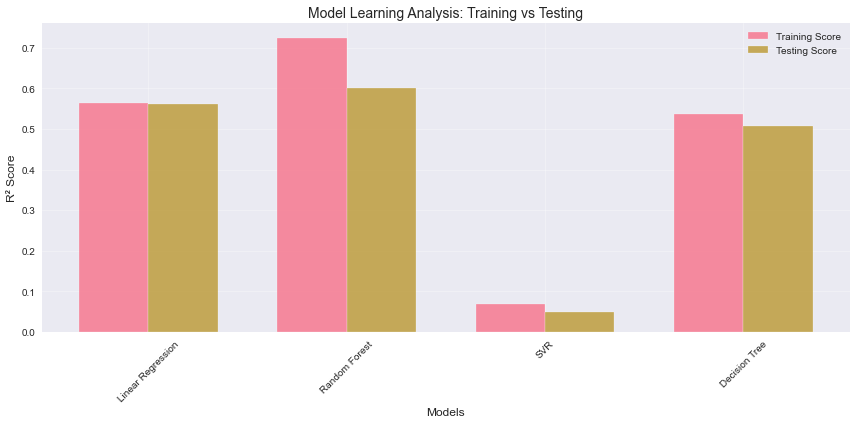


Detailed Model Performance Analysis:
+-------------------+------------------+-----------------+--------------+------------------------------------------------------------------------------------------------------+
| Model             |   Training Score |   Testing Score |   Difference | Status                                                                                               |
+===================+==================+=================+==============+======================================================================================================+
| Linear Regression |            0.563 |           0.561 |        0.001 | Good Fit - Linear model captures underlying trends                                                   |
+-------------------+------------------+-----------------+--------------+------------------------------------------------------------------------------------------------------+
| Random Forest     |            0.724 |           0.601 |        0.123 | Mod

In [583]:
# Create visualization
plt.figure(figsize=(12, 6))
models_count = len(models)
bar_width = 0.35
r1 = np.arange(models_count)
r2 = [x + bar_width for x in r1]

train_scores = [float(row[1]) for row in eval_results]
test_scores = [float(row[2]) for row in eval_results]
colors = [row[5] for row in eval_results]

plt.bar(r1, train_scores, width=bar_width, label='Training Score', alpha=0.8)
plt.bar(r2, test_scores, width=bar_width, label='Testing Score', alpha=0.8)

plt.xlabel('Models', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Model Learning Analysis: Training vs Testing', fontsize=14)
plt.xticks([r + bar_width/2 for r in range(models_count)], 
           [row[0] for row in eval_results], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# The performance of each model will be displayed in a well-organized table that includes the training score, testing score, difference, and status.
# This table helps compare models side by side.

# Display results table
print("\nDetailed Model Performance Analysis:")
headers = ["Model", "Training Score", "Testing Score", "Difference", "Status"]
print(tabulate([[r[0], r[1], r[2], r[3], r[4]] for r in eval_results], 
               headers=headers, tablefmt="grid"))

# Printing the detailed analysis
print("\nExplanining the results:")
for result in eval_results:
    print(f"\n{result[0]}:")
    print(f"- Training Score: {result[1]}")
    print(f"- Testing Score: {result[2]}")
    print(f"- Score Difference: {result[3]}")
    print(f"- Status: {result[4]}")
    
    if "Overfitting" in result[4]:
        print(" → Model shows signs of overfitting because:")
        print(f"    • Training score ({result[1]}) is notably higher than testing score ({result[2]})")
        print(f"    • Score difference of {result[3]} exceeds our threshold of 0.1")
        print("    • This suggests the model is too complex and memorizing training data")
        print("    • Consider using stronger regularization or reducing model complexity")
    elif "Underfitting" in result[4]:
        print("  → Model shows signs of underfitting because:")
        print(f"    • Both training ({result[1]}) and testing ({result[2]}) scores are low")
        print("    • Model is too simple to capture the underlying patterns")
        print("    • Consider increasing model complexity or using more relevant features")
    else:
        print("  → Model shows good generalization because:")
        print(f"    • Training ({result[1]}) and testing ({result[2]}) scores are balanced")
        print(f"    • Small score difference of {result[3]} indicates consistent performance")
        print("    • Model has found the right balance of complexity")


## **Final Model Selection:**
**Based on the comprehensive analysis above:**
1. Random Forest achieved the best R² score (0.601) among all models.
2. While showing some overfitting (0.123 difference), it maintains the best test performance
3. The hyperparameter tuned Random Forest will be used for the prediction pipeline with parameters: 

    ```Python
    {
        'n_estimators': 150, 
        'min_samples_split': 5, 
        'min_samples_leaf': 4, 
        'max_features': 'sqrt', 
        'max_depth': 10
    
        }
    ```

# **7. Create a pipeline with Random Forest**

### **7.1. Data Preprocessing**

- The data is to be preloaded into df.
- We'll encode categorical features and split the data into training and testing sets.
- Here, we create a copy of the data, clean it by removing missing values, and prepare it for encoding and splitting.

In [584]:
# Create a copy of the preprocessed data
preprocessed_df = df.copy()
# Dropping Missing values
preprocessed_df = preprocessed_df.dropna()
# Encoding Categorical Features
label_encoders = {}
categorical_cols = preprocessed_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()  # Initialize LabelEncoder
    preprocessed_df[col] = le.fit_transform(preprocessed_df[col])  # Encode column
    label_encoders[col] = le  

### **7.2. Splitting Data**

Now, we split the dataset into features (X) and target (y), and further divide them into training and testing datasets.

In [585]:
X = preprocessed_df.drop(columns=['audience_rating'])  # All columns except 'audience_rating' are features
y = preprocessed_df['audience_rating']  # 'audience_rating' is the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data into training and test sets


### **7.3. Creating and Training the Pipeline**

We set up a pipeline with a StandardScaler to normalize the data and a RandomForestRegressor model. The pipeline will be trained on the training data.

In [586]:
# Create and train the pipeline with best parameters
best_rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Normalize data
    ('rf', RandomForestRegressor(  # Step 2: Apply Random Forest Regressor
        n_estimators=150, 
        min_samples_split=5,
        min_samples_leaf=4,
        max_features='sqrt',
        max_depth=10,
        random_state=42
    ))
])
# Fit the pipeline
print("Training Random Forest Pipeline initiated")
best_rf_pipeline.fit(X_train, y_train)


Training Random Forest Pipeline initiated


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=150, random_state=42))])

### **7.4. Making Predictions and Evaluating the Model**

After training, the model predicts the audience ratings on the test set. We then evaluate its performance using metrics like R², Mean Squared Error (MSE), and Mean Absolute Error (MAE).

### **7.5. Creating a Comparison DataFrame**

We compare the actual values with the predicted values in a DataFrame, and show the differences to better understand the model's performance.

In [587]:
# Create comparison DataFrame
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})

# Reset the index to explicitly show the default index (0, 1, 2,...)
results_df.reset_index(drop=True, inplace=True)

# Display the first 10 rows with explicit index from 0 to 9
print("\nSample Predictions vs Actual Values:")
results_df.head(10)



Sample Predictions vs Actual Values:


,Actual,Predicted,Difference
0,45.0,49.834480,-4.834480
1,72.0,84.497384,-12.497384
2,53.0,59.401801,-6.401801
3,94.0,88.234679,5.765321
4,65.0,73.908179,-8.908179
5,65.0,56.461886,8.538114
6,90.0,67.828796,22.171204
7,55.0,53.141226,1.858774
8,77.0,76.202755,0.797245
9,31.0,47.514215,-16.514215


### **7.6. Visualizing Model Performance**

We generate visualizations to help understand the model’s performance. We create:

- A scatter plot for actual vs predicted values.
- A residual plot to check for any biases.
- A distribution plot to see how well the predictions fit the actual data.

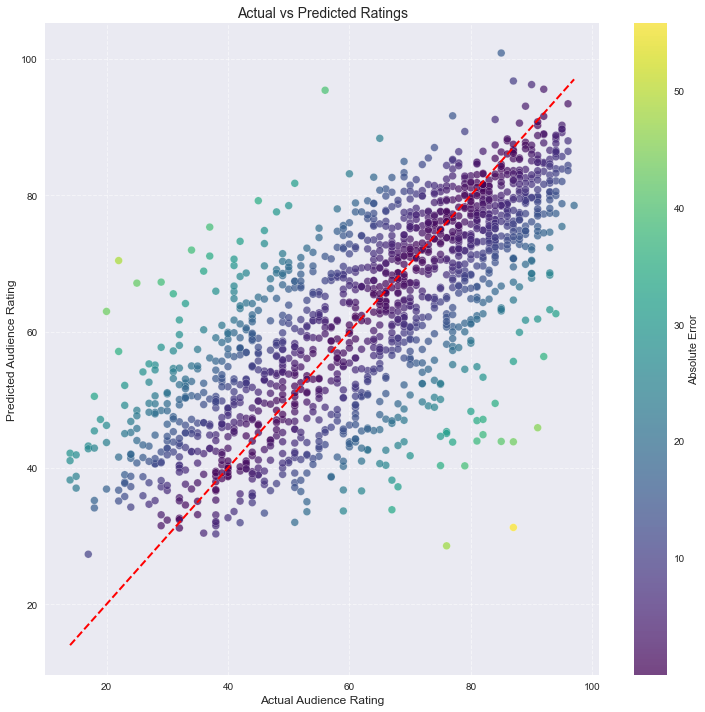

In [588]:
# Visualizations
plt.figure(figsize=(30, 10))

# 1.Scatter plot
plt.subplot(131)
scatter = plt.scatter(y_test, y_pred, c=np.abs(y_test - y_pred), cmap='viridis', alpha=0.7, edgecolors='w', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Audience Rating', fontsize=12)
plt.ylabel('Predicted Audience Rating', fontsize=12)
plt.title('Actual vs Predicted Ratings', fontsize=14)
plt.colorbar(scatter, label='Absolute Error')  # Colorbar to indicate error magnitude
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- The scatter plot shows the relationship between actual and predicted audience ratings. The red diagonal line represents perfect predictions, while the spread of points indicates the model's performance. The model generally performs well but tends to over-predict low ratings and under-predict high ratings, as seen in the deviation from the line. The color gradient reflects varying prediction error levels across ratings.

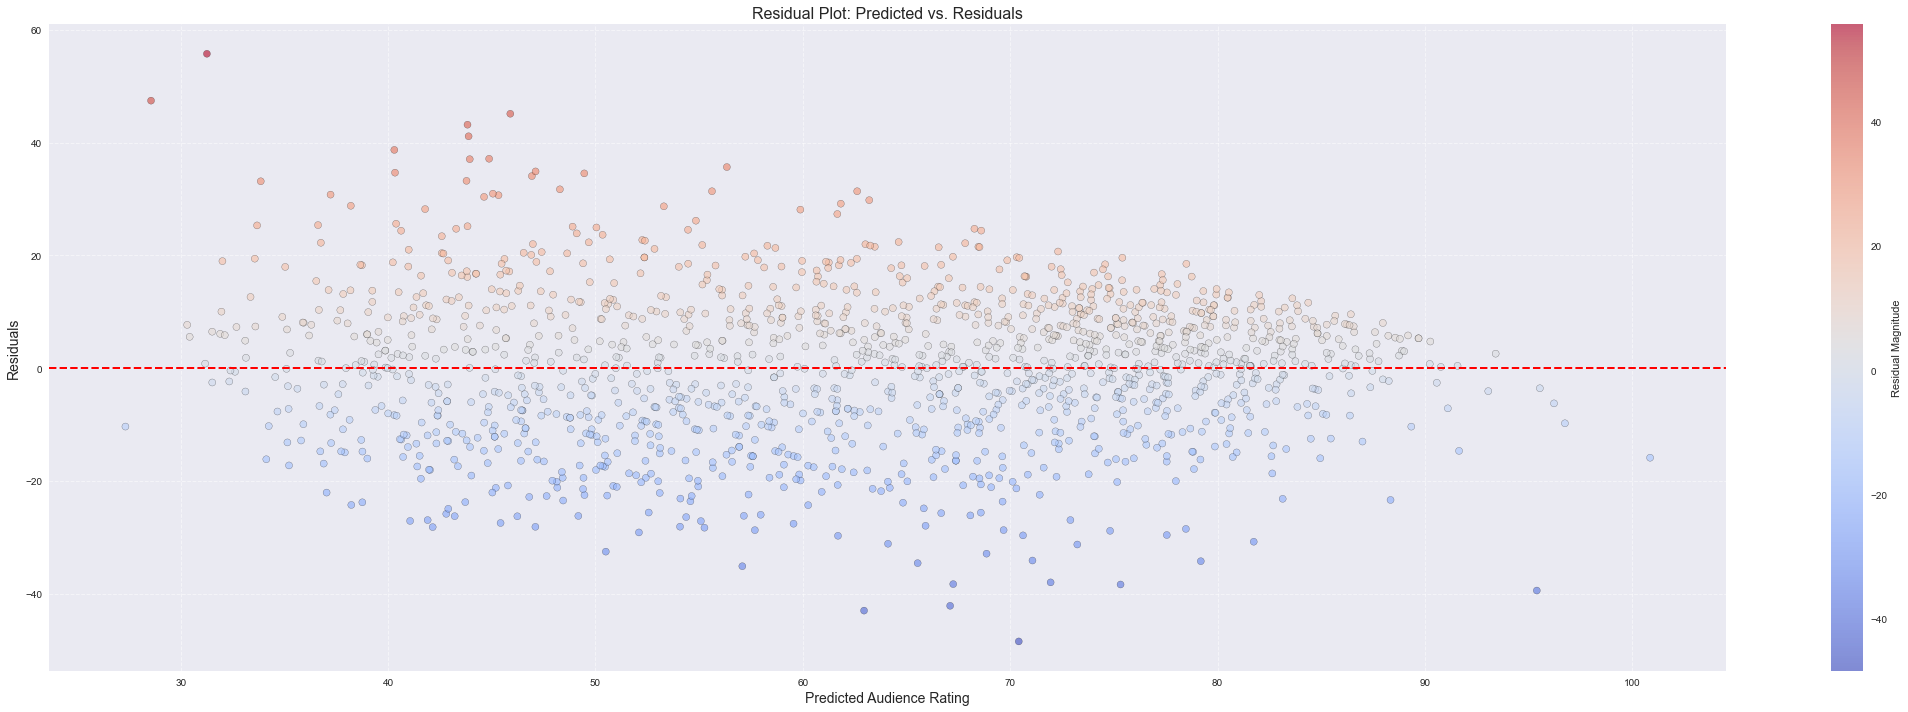

In [589]:
# 2. Residual Plot
plt.figure(figsize=(30, 10))  
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, c=residuals, cmap='coolwarm', alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Audience Rating', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot: Predicted vs. Residuals', fontsize=16)
plt.colorbar(label='Residual Magnitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The residual plot shows the residuals (prediction errors) across different predicted ratings. The red dashed line at zero represents perfect predictions. Points are fairly evenly distributed above and below this line, suggesting balanced prediction errors. The spread appears wider in the middle ratings (40-70) and narrows at the extremes.

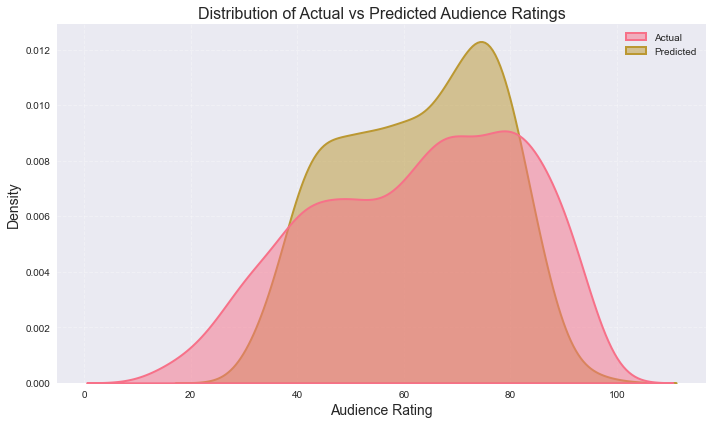

In [590]:
# 3. Distribution Plot
plt.figure(figsize=(10, 6))  
# Distribution of actual vs predicted values
sns.kdeplot(data=results_df[['Actual', 'Predicted']], fill=True, alpha=0.5, linewidth=2)
plt.title('Distribution of Actual vs Predicted Audience Ratings', fontsize=16)
plt.xlabel('Audience Rating', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


The histogram shows audience ratings skewed towards higher values (mean 62.99). There's a prominent peak around 75-80 and a smaller peak around 40-45. The blue smoothing line helps visualize this bimodal distribution pattern.

### **7.7. Saving the Model and Pipeline**

We save the trained model and pipeline, along with the prediction results, to files for later use or deployment.

In [591]:
# Save the model and pipeline
print("Saving model and pipeline.")
joblib.dump(best_rf_pipeline, 'random_forest_pipeline.joblib')  # Save model
results_df.to_csv('audience_rating_prediction_results.csv', index=False)  # Save prediction results
print("Model, pipeline, and predictions of audience_rating with Random Forest had been saved successfully.")


Saving model and pipeline.
Model, pipeline, and predictions of audience_rating with Random Forest had been saved successfully.


## **Conclusion**

In conclusion, this technical document outlines the process of building a predictive model for audience ratings using a dataset from Rotten Tomatoes. Here's a summary of the key points:

1. The process began with converting the dataset from .xls to .csv format for easier handling.

2. Necessary libraries were imported for data manipulation, visualization, and machine learning tasks.

3. The dataset was explored and preprocessed, including handling missing values and encoding categorical variables.

4. Feature selection was performed to identify the most relevant predictors for audience ratings.

5. The data was split into training and testing sets, and features were scaled using StandardScaler.

6. Three regression models were evaluated: Linear Regression, Decision Tree, Support Vector Regression, and Random Forest.

7. The Random Forest model performed the best, with hyperparameter tuning using GridSearchCV.

8. A pipeline was created to streamline the preprocessing and modeling steps.

9. The final model's performance was evaluated using various metrics, including MAE, MSE, and R-squared.

10. The model was saved for future use, and a sample prediction was demonstrated.

Overall, this notebook provides a comprehensive walkthrough of building a machine learning model for predicting audience ratings, from data preparation to model evaluation and deployment. The Random Forest model showed promising results, indicating its potential for predicting audience ratings based on various movie features.

